In [200]:
import numpy as np
import pandas as pd

In [321]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [362]:
sample_size, nr_sample = 5, 10
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [396]:
len(bounded_samples)

60

In [397]:
row_mean = np.mean(bounded_samples, axis=1)
row_std = np.std(bounded_samples, axis=1)    

In [382]:
bounded_samples

,0,1,2,3,4,label
0,0.876424,0.001062,7.038201e-01,0.852222,0.497655,arcsine
1,0.119590,0.093710,8.650545e-01,0.068920,0.019132,arcsine
2,0.774984,0.994650,3.846335e-05,0.519147,0.915840,arcsine
3,0.673097,0.820832,1.958803e-01,0.983410,0.812101,arcsine
4,0.566630,0.049048,3.062530e-01,0.760088,0.409139,arcsine
5,0.397090,0.680796,5.206316e-01,0.727551,0.656060,arcsine
6,0.909276,0.533977,9.795504e-01,0.231074,0.020055,arcsine
7,0.206998,0.031716,9.293129e-01,0.005417,0.693208,arcsine
8,0.574470,0.921563,9.452199e-02,0.950285,0.275321,arcsine
9,0.858678,0.200999,9.671289e-01,0.239436,0.065697,arcsine


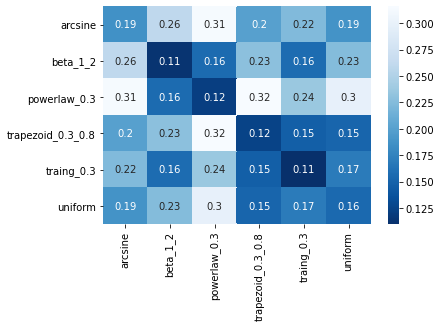

In [363]:
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

In [364]:
original_std

array([[0.1096661 , 0.10068648, 0.13189304, 0.08171019, 0.07731934,
        0.08850243],
       [0.10068648, 0.06605019, 0.06840526, 0.09442903, 0.06839687,
        0.09812464],
       [0.13189304, 0.06840526, 0.06573245, 0.104037  , 0.08317177,
        0.11801777],
       [0.08171019, 0.09442903, 0.104037  , 0.06566159, 0.06560662,
        0.06987209],
       [0.07731934, 0.06839687, 0.08317177, 0.06560662, 0.05544392,
        0.06851639],
       [0.08850243, 0.09812464, 0.11801777, 0.06987209, 0.06851639,
        0.08463176]])

In [365]:
nr_moments = 10
moments_df = dem.get_moments(bounded_samples, nr_moments)

num_steps = 100
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
edf_df = dem.get_edf(bounded_samples, x_b)

max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
ecf_df = dem.get_ecf(bounded_samples, t)

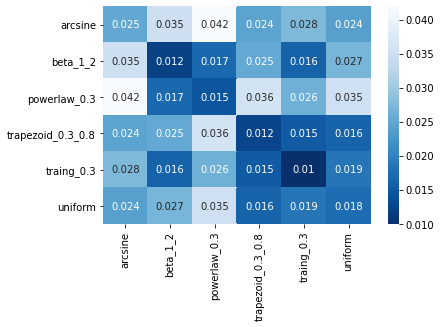

In [366]:
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, bounded_samples.iloc[:,-1].unique())

In [367]:
moments_std

array([[0.01530921, 0.01416317, 0.01596045, 0.01240795, 0.0115702 ,
        0.01237319],
       [0.01416317, 0.00903652, 0.00893583, 0.01129008, 0.00853978,
        0.01275537],
       [0.01596045, 0.00893583, 0.00955591, 0.011471  , 0.00944094,
        0.01441491],
       [0.01240795, 0.01129008, 0.011471  , 0.00764833, 0.00824654,
        0.00895577],
       [0.0115702 , 0.00853978, 0.00944094, 0.00824654, 0.0062626 ,
        0.00911582],
       [0.01237319, 0.01275537, 0.01441491, 0.00895577, 0.00911582,
        0.01045263]])

In [187]:
original_d, original_std = d.w_distance(bounded_samples)

kde_d,  = d.w_distance(kde_df)

In [191]:
edf_d = d.w_distance(edf_df)

In [195]:
ecf_d = d.w_distance(ecf_df)

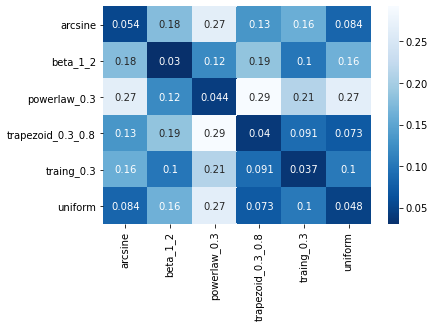

In [183]:
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

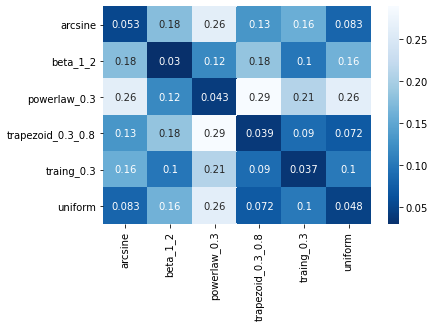

In [193]:
d.plot_matrix(edf_d, bounded_samples.iloc[:,-1].unique())

In [185]:
d.corr_coef(original_d,moments_d)

(0.9876127663617322, 6.170506532628963e-29)

In [189]:
d.corr_coef(original_d,kde_d)

(0.8003948506194818, 4.6487826740745245e-09)

In [192]:
d.corr_coef(original_d,edf_d)

(0.9999926976144188, 8.499524315421426e-84)

In [196]:
d.corr_coef(original_d,ecf_d)

(0.8355790513823939, 2.2980472074345945e-10)

In [199]:
for i in range(2,11):
    moments_df = dem.get_moments(bounded_samples, i)
    moments_d = d.w_distance(moments_df)
from tqdm.auto import tqdm
    print(d.corr_coef(original_d,moments_d))

(0.9848153360892653, 1.9249024853683623e-27)
(0.986102387284565, 4.312758688729029e-28)
(0.9881232195226441, 3.029143074118292e-29)
(0.9880658756052185, 3.2861829355417646e-29)
(0.9885843408590064, 1.5505269953392576e-29)
(0.988218077512156, 2.645020582577859e-29)
(0.9880538549895802, 3.3426033980517137e-29)
(0.9877891946799686, 4.8416410607244554e-29)
(0.9876127663617322, 6.170506532628963e-29)


In [359]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,21))

In [360]:
moments_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

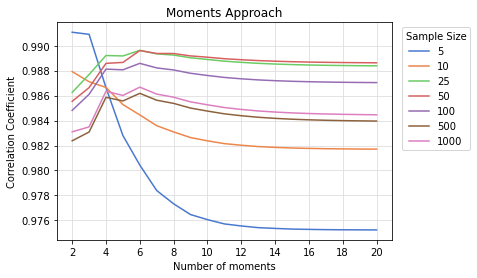

In [361]:
d.plot_cv_moments(moments_res)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

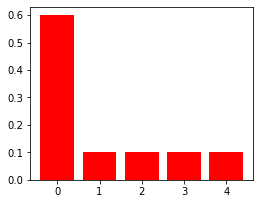

In [318]:
sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]
# and for scipy.stats.entropy (gives KL divergence here) we want distributions
P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)
# compare to this sample / distribution:
sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.5)
plt.subplot(2,2,1)
plt.bar(np.arange(len(P)), P, color='r')
plt.xticks(np.arange(len(P)), np.arange(1,5), fontsize=0)
plt.subplot(2,2,3)
plt.bar(np.arange(len(Q)), Q, color='b')
plt.xticks(np.arange(len(Q)), np.arange(1,5))
plt.title("Wasserstein distance {:.4}\nKL divergence {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ), scipy.stats.entropy(P, Q)), fontsize=10)
plt.subplot(2,2,2)
plt.bar(np.arange(len(P)), P, color='r')
plt.xticks(np.arange(len(P)), np.arange(1,5), fontsize=0)
plt.subplot(2,2,4)
plt.bar(np.arange(len(Q2)), Q2, color='b')
plt.xticks(np.arange(len(Q2)), np.arange(1,5))
plt.title("Wasserstein distance {:.4}\nKL divergence {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ2), scipy.stats.entropy(P, Q2)), fontsize=10)
plt.show()